In [1]:
!pip install pycaret

You should consider upgrading via the '/Users/patsnap/anaconda2/bin/python -m pip install --upgrade pip' command.


In [2]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [3]:
# sampling the data to select only 1000 documents
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

In [4]:
from pycaret.nlp import *

In [5]:
exp_nlp101 = setup(data = data, target = 'en', session_id = 123)

Description,Value
session_id,123
# Documents,1000
Vocab Size,4573
Custom Stopwords,False


In [6]:
#convert 'en' column of dataset into list format
text_list = list(data['en'])
type(text_list)

list

In [7]:
exp_nlp101_list = setup(data = text_list, session_id = 123)

Description,Value
session_id,123
# Documents,1000
Vocab Size,4573
Custom Stopwords,False


# Topic Model

In [8]:
lda = create_model('lda')
print(lda)

LdaModel(num_terms=4573, num_topics=4, decay=0.5, chunksize=100)


In [9]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)

In [10]:
lda_results = assign_model(lda)
lda_results.head()

,en,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,praxide marry child primary school train tailo...,0.001872,0.006236,0.990371,0.001521,Topic 2,0.99
1,practitioner run year old life wife child biol...,0.262534,0.129097,0.606903,0.001466,Topic 2,0.61
2,live child boy girl range year sell use clothi...,0.002032,0.218908,0.777409,0.001651,Topic 2,0.78
3,phanice marry child daughter secondary school ...,0.002075,0.070740,0.925499,0.001686,Topic 2,0.93
4,year old hotel kaptembwa operating hotel last ...,0.001838,0.097336,0.899333,0.001493,Topic 2,0.90


# Model plotting

In [11]:
plot_model()

In [12]:
plot_model(plot = 'bigram')

In [13]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [14]:
plot_model(lda, plot = 'topic_distribution')

In [15]:
plot_model(lda, plot = 'tsne')

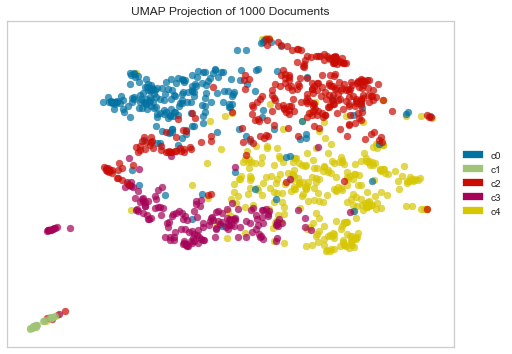

In [16]:
plot_model(lda, plot = 'umap')

# Model Evaluation, Saving, Loading

In [17]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [18]:
save_model(lda,'Final LDA Model 08Feb2020')

Model Succesfully Saved


In [19]:
saved_lda = load_model('Final LDA Model 08Feb2020')

Model Sucessfully Loaded


In [20]:
print(saved_lda)

LdaModel(num_terms=4573, num_topics=4, decay=0.5, chunksize=100)


# Text Preprocessing

In [22]:
from pycaret.nlp import *
exp_nlp102 = setup(data = data, target = 'en', session_id = 123,
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'])

Description,Value
session_id,123
# Documents,1000
Vocab Size,4552
Custom Stopwords,True


In [ ]:
lda = create_model('lda')
plot_model(lda, plot = 'topic_distribution')

# Model Tuning/Evaluation

In [ ]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

In [ ]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'status')

In [ ]:
save_experiment('Experiment_123 08Feb2020')

In [ ]:
saved_experiment = load_experiment('Experiment_123 08Feb2020')

In [ ]:
saved_lda = saved_experiment[5]
print(saved_lda)